In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from urllib.request import urlopen
from bs4 import BeautifulSoup
import re

# Use beautifulsoup to extract web data

In [15]:
url="https://www.hubertiming.com/results/2018MLK"
html=urlopen(url)

In [16]:
soup = BeautifulSoup(html)

In [7]:
import time
import datetime
import smtplib

In [18]:
title = soup.title
print(title.text)

Race results for the 2018 MLK Dream Run!


In [27]:
links = soup.find_all('a',href=True)
for link in links:
    print(link.get('href'))

https://www.mlkdreamrun.com/
mailto:timing@hubertiming.com
https://www.hubertiming.com
/results/2018MLK10K
/results/2018MLK15K
/results/summary/2018MLK
#tabs-1
https://www.hubertiming.com/
https://facebook.com/hubertiming/


In [60]:
data = []

allrows = soup.find_all("tr")
for row in allrows:
    row_list = row.find_all("td")
    datarow = []
    for cell in row_list:
        datarow.append(cell.text)
    data.append(datarow)

data = data[5:]
titles = data[0]

print(data[0])
print(titles)
print(data[:5])

['1', '1191', '\r\n\r\n                    MAX RANDOLPH\r\n\r\n                ', 'M', '29', 'WASHINGTON', 'DC', '5:25', '16:48', '\r\n\r\n                    1 of 78\r\n\r\n                ', 'M 21-39', '\r\n\r\n                    1 of 33\r\n\r\n                ', '0:08', '16:56']
['1', '1191', '\r\n\r\n                    MAX RANDOLPH\r\n\r\n                ', 'M', '29', 'WASHINGTON', 'DC', '5:25', '16:48', '\r\n\r\n                    1 of 78\r\n\r\n                ', 'M 21-39', '\r\n\r\n                    1 of 33\r\n\r\n                ', '0:08', '16:56']
[['1', '1191', '\r\n\r\n                    MAX RANDOLPH\r\n\r\n                ', 'M', '29', 'WASHINGTON', 'DC', '5:25', '16:48', '\r\n\r\n                    1 of 78\r\n\r\n                ', 'M 21-39', '\r\n\r\n                    1 of 33\r\n\r\n                ', '0:08', '16:56'], ['2', '1080', '\r\n\r\n                    NEED NAME KAISER RUNNER\r\n\r\n                ', 'M', '25', 'PORTLAND', 'OR', '5:39', '17:31', '\r\n\r

In [61]:
df = pd.DataFrame(data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,1191,\r\n\r\n MAX RANDOLPH\r\n\r...,M,29,WASHINGTON,DC,5:25,16:48,\r\n\r\n 1 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 1 of 33\r\n\r\n ...,0:08,16:56
1,2,1080,\r\n\r\n NEED NAME KAISER R...,M,25,PORTLAND,OR,5:39,17:31,\r\n\r\n 2 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 2 of 33\r\n\r\n ...,0:09,17:40
2,3,1275,\r\n\r\n DAN FRANEK\r\n\r\n...,M,52,PORTLAND,OR,5:53,18:15,\r\n\r\n 3 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 1 of 27\r\n\r\n ...,0:07,18:22
3,4,1223,\r\n\r\n PAUL TAYLOR\r\n\r\...,M,54,PORTLAND,OR,5:58,18:31,\r\n\r\n 4 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 2 of 27\r\n\r\n ...,0:07,18:38
4,5,1245,\r\n\r\n THEO KINMAN\r\n\r\...,M,22,,,6:17,19:31,\r\n\r\n 5 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 3 of 33\r\n\r\n ...,0:09,19:40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
186,187,1254,\r\n\r\n CYNTHIA HARRIS\r\n...,F,64,PORTLAND,OR,21:53,1:07:51,\r\n\r\n 110 of 113\r\n\r\n...,F 55+,\r\n\r\n 14 of 14\r\n\r\n ...,1:19,1:09:10
187,188,1085,\r\n\r\n EBONY LAWRENCE\r\n...,F,30,PORTLAND,OR,22:00,1:08:12,\r\n\r\n 111 of 113\r\n\r\n...,F 21-39,\r\n\r\n 53 of 53\r\n\r\n ...,0:58,1:09:10
188,189,1170,\r\n\r\n ANTHONY WILLIAMS\r...,M,39,PORTLAND,OR,22:19,1:09:11,\r\n\r\n 78 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 33 of 33\r\n\r\n ...,0:08,1:09:19
189,190,2087,\r\n\r\n LEESHA POSEY\r\n\r...,F,43,PORTLAND,OR,30:17,1:33:53,\r\n\r\n 112 of 113\r\n\r\n...,F 40-54,\r\n\r\n 36 of 37\r\n\r\n ...,0:00,1:33:53


In [63]:
header_list =[]

col_heads = soup.find_all('th')
for coln in col_heads:
    header_list.append(coln.text)

print(header_list)

['Place', 'Bib', 'Name', 'Gender', 'Age', 'City', 'State', 'Chip Pace', 'Chip Time', 'Gender Place', 'Age Group', 'Age Group Place', 'Time to Start', 'Gun Time']


In [65]:
df.columns = header_list
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Chip Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,1,1191,\r\n\r\n MAX RANDOLPH\r\n\r...,M,29,WASHINGTON,DC,5:25,16:48,\r\n\r\n 1 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 1 of 33\r\n\r\n ...,0:08,16:56
1,2,1080,\r\n\r\n NEED NAME KAISER R...,M,25,PORTLAND,OR,5:39,17:31,\r\n\r\n 2 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 2 of 33\r\n\r\n ...,0:09,17:40
2,3,1275,\r\n\r\n DAN FRANEK\r\n\r\n...,M,52,PORTLAND,OR,5:53,18:15,\r\n\r\n 3 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 1 of 27\r\n\r\n ...,0:07,18:22
3,4,1223,\r\n\r\n PAUL TAYLOR\r\n\r\...,M,54,PORTLAND,OR,5:58,18:31,\r\n\r\n 4 of 78\r\n\r\n ...,M 40-54,\r\n\r\n 2 of 27\r\n\r\n ...,0:07,18:38
4,5,1245,\r\n\r\n THEO KINMAN\r\n\r\...,M,22,,,6:17,19:31,\r\n\r\n 5 of 78\r\n\r\n ...,M 21-39,\r\n\r\n 3 of 33\r\n\r\n ...,0:09,19:40


# Clean the data

In [85]:
# Use replace method to delete unwanted part of string

df['Name'] = [ name.replace("\r\n","") for name in df['Name']  ]
df['Gender Place'] = [ gen.replace("\r\n","") for gen in df['Gender Place']  ]
df['Age Group Place'] = [ age.replace("\r\n","") for age in df['Age Group Place']  ]

df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Chip Time,Gender Place,Age Group,Age Group Place,Time to Start,Gun Time
0,1,1191,MAX RANDOLPH,M,29,WASHINGTON,DC,5:25,16:48,1 of 78,M 21-39,1 of 33,0:08,16:56
1,2,1080,NEED NAME KAISER RUNNER ...,M,25,PORTLAND,OR,5:39,17:31,2 of 78,M 21-39,2 of 33,0:09,17:40
2,3,1275,DAN FRANEK,M,52,PORTLAND,OR,5:53,18:15,3 of 78,M 40-54,1 of 27,0:07,18:22
3,4,1223,PAUL TAYLOR,M,54,PORTLAND,OR,5:58,18:31,4 of 78,M 40-54,2 of 27,0:07,18:38
4,5,1245,THEO KINMAN,M,22,,,6:17,19:31,5 of 78,M 21-39,3 of 33,0:09,19:40


In [97]:
df[['Sex','Age group']] = df.pop('Age Group').str.split(n=1,expand=True)
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Chip Time,Gender Place,Age Group Place,Time to Start,Gun Time,Sex,Age group
0,1,1191,MAX RANDOLPH,M,29,WASHINGTON,DC,5:25,16:48,1 of 78,1 of 33,0:08,16:56,M,21-39
1,2,1080,NEED NAME KAISER RUNNER ...,M,25,PORTLAND,OR,5:39,17:31,2 of 78,2 of 33,0:09,17:40,M,21-39
2,3,1275,DAN FRANEK,M,52,PORTLAND,OR,5:53,18:15,3 of 78,1 of 27,0:07,18:22,M,40-54
3,4,1223,PAUL TAYLOR,M,54,PORTLAND,OR,5:58,18:31,4 of 78,2 of 27,0:07,18:38,M,40-54
4,5,1245,THEO KINMAN,M,22,,,6:17,19:31,5 of 78,3 of 33,0:09,19:40,M,21-39


In [98]:
df = df.drop('Sex', axis=1)
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Chip Time,Gender Place,Age Group Place,Time to Start,Gun Time,Age group
0,1,1191,MAX RANDOLPH,M,29,WASHINGTON,DC,5:25,16:48,1 of 78,1 of 33,0:08,16:56,21-39
1,2,1080,NEED NAME KAISER RUNNER ...,M,25,PORTLAND,OR,5:39,17:31,2 of 78,2 of 33,0:09,17:40,21-39
2,3,1275,DAN FRANEK,M,52,PORTLAND,OR,5:53,18:15,3 of 78,1 of 27,0:07,18:22,40-54
3,4,1223,PAUL TAYLOR,M,54,PORTLAND,OR,5:58,18:31,4 of 78,2 of 27,0:07,18:38,40-54
4,5,1245,THEO KINMAN,M,22,,,6:17,19:31,5 of 78,3 of 33,0:09,19:40,21-39


In [99]:
#see how many null values and fill them as possible

df.isnull().sum()

Place              0
Bib                0
Name               0
Gender             0
Age                0
City               0
State              0
Chip Pace          0
Chip Time          0
Gender Place       0
Age Group Place    0
Time to Start      0
Gun Time           0
Age group          9
dtype: int64

In [113]:
df['Age']= pd.to_numeric(df['Age'])
        
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Chip Time,Gender Place,Age Group Place,Time to Start,Gun Time,Age group
0,1,1191,MAX RANDOLPH,M,29.0,WASHINGTON,DC,5:25,16:48,1 of 78,1 of 33,0:08,16:56,21-39
1,2,1080,NEED NAME KAISER RUNNER ...,M,25.0,PORTLAND,OR,5:39,17:31,2 of 78,2 of 33,0:09,17:40,21-39
2,3,1275,DAN FRANEK,M,52.0,PORTLAND,OR,5:53,18:15,3 of 78,1 of 27,0:07,18:22,40-54
3,4,1223,PAUL TAYLOR,M,54.0,PORTLAND,OR,5:58,18:31,4 of 78,2 of 27,0:07,18:38,40-54
4,5,1245,THEO KINMAN,M,22.0,,,6:17,19:31,5 of 78,3 of 33,0:09,19:40,21-39


In [137]:
df['Age']=round(df['Age'].fillna(df['Age'].mean()),1)

In [136]:
avg_age = round(df['Age'].mean(),1)
avg_age

38.8

In [138]:
df[df['Age group'].isnull()]

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Chip Time,Gender Place,Age Group Place,Time to Start,Gun Time,Age group
7,8,1154,UNKNOWN RUNNER SEE TIMER ...,M,38.8,,,8:03,24:58,7 of 78,1 of 9,2:00,26:58,None
8,9,1163,UNKNOWN RUNNER SEE TIMER ...,M,38.8,,,8:04,25:01,8 of 78,2 of 9,1:59,27:00,None
17,18,1252,ETHAN POWELL,M,38.8,,,8:40,26:52,14 of 78,3 of 9,0:11,27:03,None
21,22,1246,KERRY FLAGG,M,38.8,,,8:45,27:10,18 of 78,4 of 9,0:10,27:20,None
22,23,1244,JARRED FLAGG,M,38.8,,,8:46,27:11,19 of 78,5 of 9,0:10,27:21,None
48,49,1247,THEO KINWAN,F,38.8,,,9:24,29:09,14 of 113,6 of 9,0:10,29:19,None
73,74,1261,CHADI BOTRNS,M,38.8,,,11:04,34:19,46 of 78,7 of 9,0:30,34:49,None
119,120,1262,KARI SCHLINKMEIER ...,F,38.8,,,15:18,47:28,60 of 113,8 of 9,0:13,47:41,None
143,144,1250,KIM ONTI WILSON ...,F,38.8,,,17:42,54:53,78 of 113,9 of 9,0:13,55:06,None


In [141]:
df['Age group']=df['Age group'].fillna('21-39')
df[df['Age group'].isnull()]

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Chip Time,Gender Place,Age Group Place,Time to Start,Gun Time,Age group


In [142]:
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Chip Time,Gender Place,Age Group Place,Time to Start,Gun Time,Age group
0,1,1191,MAX RANDOLPH,M,29.0,WASHINGTON,DC,5:25,16:48,1 of 78,1 of 33,0:08,16:56,21-39
1,2,1080,NEED NAME KAISER RUNNER ...,M,25.0,PORTLAND,OR,5:39,17:31,2 of 78,2 of 33,0:09,17:40,21-39
2,3,1275,DAN FRANEK,M,52.0,PORTLAND,OR,5:53,18:15,3 of 78,1 of 27,0:07,18:22,40-54
3,4,1223,PAUL TAYLOR,M,54.0,PORTLAND,OR,5:58,18:31,4 of 78,2 of 27,0:07,18:38,40-54
4,5,1245,THEO KINMAN,M,22.0,,,6:17,19:31,5 of 78,3 of 33,0:09,19:40,21-39


In [143]:
import seaborn as sns

In [368]:
x = datetime.datetime.strptime(df['Chip Time'][10], '%M:%S').time()

print(type(x))

<class 'datetime.time'>


In [294]:
df.to_csv (r'C:\Users\panka\Desktop\web_race.csv')

# Use re.fullmatch find unmatched strings and fix them

In [329]:
import re

In [388]:
print(re.fullmatch(r'\d{1}:\d{2}:\d{2}', df['Chip Time'][7]))
print(re.fullmatch(r'\d{1}:\d{2}:\d{2}', df['Chip Time'][180]))

None
<re.Match object; span=(0, 7), match='1:02:58'>


In [419]:
def strmodi(y):
    if (re.fullmatch(r'\d{1}:\d{2}:\d{2}', y)) is None:
        return '00:'+y
    else:
        return y

In [420]:
df['chiptime'] = df['Chip Time'].apply(lambda time: strmodi(time))

In [424]:
type(df['chiptime'][0])

str

# Change string to time(with date) using to_timedelta
# Then change time to timelength (from ns to seconds) using astype('timedelta[s]')

In [425]:
df['chipminute'] = pd.to_timedelta(df['chiptime'])

In [429]:
df['chip_minute'] = df['chipminute'].astype('timedelta64[s]')/60

In [433]:
df['chip_minute'].info()
df['chipminute'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 191 entries, 0 to 190
Series name: chip_minute
Non-Null Count  Dtype  
--------------  -----  
191 non-null    float64
dtypes: float64(1)
memory usage: 1.6 KB
<class 'pandas.core.series.Series'>
RangeIndex: 191 entries, 0 to 190
Series name: chipminute
Non-Null Count  Dtype          
--------------  -----          
191 non-null    timedelta64[ns]
dtypes: timedelta64[ns](1)
memory usage: 1.6 KB


In [432]:
df.head()

,Place,Bib,Name,Gender,Age,City,State,Chip Pace,Chip Time,Gender Place,Age Group Place,Time to Start,Gun Time,Age group,chipt,chiptime,chipminute,chip_minute
0,1,1191,MAX RANDOLPH,M,29.0,WASHINGTON,DC,5:25,16:48,1 of 78,1 of 33,0:08,16:56,21-39,00:16:48,00:16:48,0 days 00:16:48,16.800000
1,2,1080,NEED NAME KAISER RUNNER ...,M,25.0,PORTLAND,OR,5:39,17:31,2 of 78,2 of 33,0:09,17:40,21-39,00:17:31,00:17:31,0 days 00:17:31,17.516667
2,3,1275,DAN FRANEK,M,52.0,PORTLAND,OR,5:53,18:15,3 of 78,1 of 27,0:07,18:22,40-54,00:18:15,00:18:15,0 days 00:18:15,18.250000
3,4,1223,PAUL TAYLOR,M,54.0,PORTLAND,OR,5:58,18:31,4 of 78,2 of 27,0:07,18:38,40-54,00:18:31,00:18:31,0 days 00:18:31,18.516667
4,5,1245,THEO KINMAN,M,22.0,,,6:17,19:31,5 of 78,3 of 33,0:09,19:40,21-39,00:19:31,00:19:31,0 days 00:19:31,19.516667


C:\Users\panka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Avg minutes by gender')

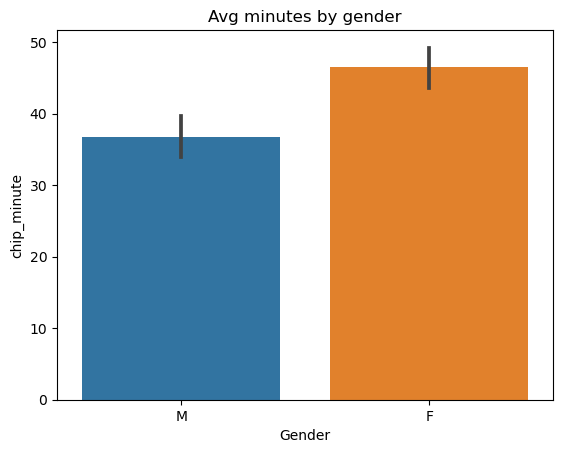

In [434]:
sns.barplot(df['Gender'],df['chip_minute'])
plt.title('Avg minutes by gender')

In [438]:
df['Age'] = df['Age'].astype(int)
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 191 entries, 0 to 190
Series name: Age
Non-Null Count  Dtype
--------------  -----
191 non-null    int32
dtypes: int32(1)
memory usage: 892.0 bytes


C:\Users\panka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='chip_minute'>

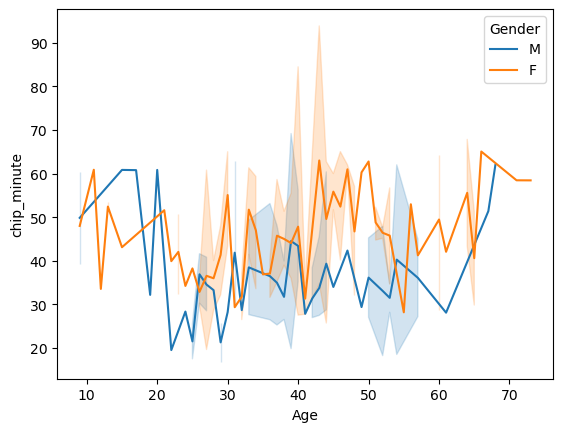

In [440]:
sns.lineplot(df['Age'],df['chip_minute'],hue=df['Gender'])

In [441]:
df.describe()

,Age,chipminute,chip_minute
count,191.000000,191,191.000000
mean,38.717277,0 days 00:42:28.691099476,42.478185
std,12.905065,0 days 00:14:54.181815889,14.903030
min,9.000000,0 days 00:16:48,16.800000
25%,30.000000,0 days 00:29:02.500000,29.041667
50%,38.000000,0 days 00:39:30,39.500000
75%,47.000000,0 days 00:54:13,54.216667
max,73.000000,0 days 01:43:27,103.450000


Text(0, 0.5, 'Run time')

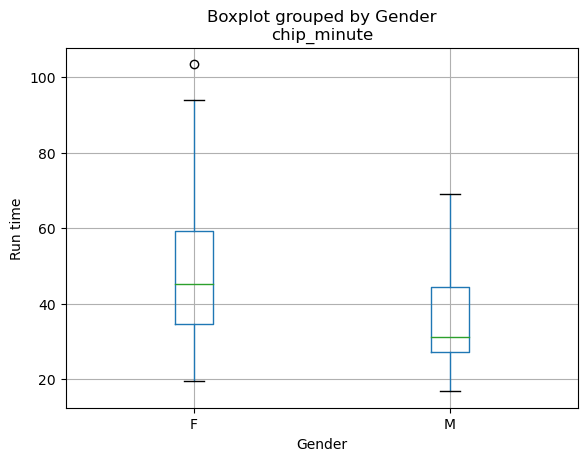

In [446]:
df.boxplot(column='chip_minute',by='Gender')
plt.ylabel('Run time')

C:\Users\panka\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Avg run time by age group')

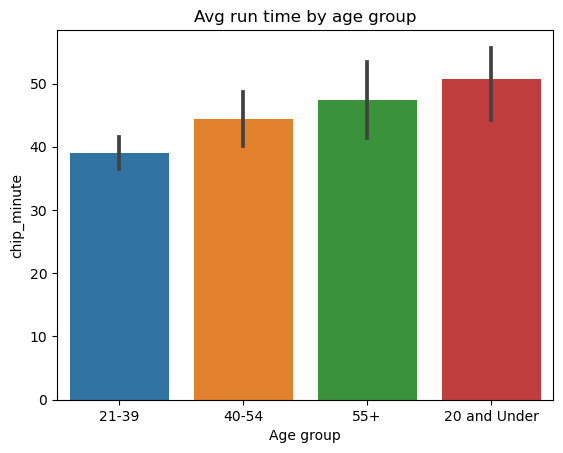

In [448]:
sns.barplot(df['Age group'],df['chip_minute'])
plt.title('Avg run time by age group')

# Change string to datetime.time

In [421]:
def strtotime(y):
    if (re.fullmatch(r'\d{1}:\d{2}:\d{2}', y)) is None:
        return datetime.datetime.strptime(y, '%M:%S').time()
    else:
        return datetime.datetime.strptime(y, '%H:%M:%S').time()

In [390]:
df['chipt'] = df['Chip Time'].apply(lambda t: strtotime(t))

In [403]:
df[['chipt']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191 entries, 0 to 190
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   chipt   191 non-null    object
dtypes: object(1)
memory usage: 1.6+ KB


In [408]:
from datetime import datetime, date, time, timedelta